In [1]:
%run ../../shared_setup.ipynb

docker image cggh/biipy:v1.6.0


In [2]:
dup_samples

{'3d7_hb3': ['C01/PG0062-C/ERR019070',
  'C02/PG0053-C/ERR019067',
  'C02/PG0055-C/ERR019066',
  'C02/PG0056-C/ERR019068'],
 '7g8_gb4': ['AUD/PG0112-CW/ERR045639',
  'JC9/PG0111-C/ERR029409',
  'JE11/PG0100-CW/ERR045630',
  'JF6/PG0079-CW/ERR045637',
  'KB8/PG0104-CW/ERR045642',
  'LA10/PG0086-CW/ERR045629',
  'NIC/PG0095-C/ERR027107',
  'QF5/PG0078-CW/ERR045638',
  'XD8/PG0105-CW/ERR045628',
  'XF12/PG0102-CW/ERR045635'],
 'hb3_dd2': []}

In [3]:
gatk_raw = dict()
gatk_filtered = dict()

for cross in CROSSES:
    log('== %s ==' % cross)
    
    callset = np.load(GATK_CALLSET_FN_TEMPLATE.format(cross=cross))
    gatk_raw[cross] = callset

    log('filter variants')
    callset_pass = filter_variants(callset, 'FILTER_PASS')

    log('filter calls')
    callset_cflt = filter_calls(callset_pass, gatk_conf_calls)
    
    gatk_filtered[cross] = callset_pass


2016-03-08 22:41:26.728007 :: == 3d7_hb3 ==
2016-03-08 22:41:26.729271 :: filter variants
2016-03-08 22:41:27.656193 :: filter variants: excluding 155288 (80.9%) retaining 36598 (19.1%) of 191886 variants
2016-03-08 22:41:27.669741 :: filter calls
2016-03-08 22:41:27.680466 :: filter calls: excluding 1413 (0.2%) retaining 767145 (99.8%) of 768558 calls
2016-03-08 22:41:27.681598 :: == hb3_dd2 ==
2016-03-08 22:41:27.682337 :: filter variants
2016-03-08 22:41:30.113810 :: filter variants: excluding 345466 (92.2%) retaining 29067 (7.8%) of 374533 variants
2016-03-08 22:41:30.133867 :: filter calls
2016-03-08 22:41:30.148722 :: filter calls: excluding 14495 (1.3%) retaining 1060984 (98.7%) of 1075479 calls
2016-03-08 22:41:30.150430 :: == 7g8_gb4 ==
2016-03-08 22:41:30.151151 :: filter variants
2016-03-08 22:41:32.764485 :: filter variants: excluding 358058 (92.8%) retaining 27709 (7.2%) of 385767 variants
2016-03-08 22:41:32.781939 :: filter calls
2016-03-08 22:41:32.798051 :: filter call

In [4]:
cortex_raw = dict()
cortex_filtered = dict()

for cross in CROSSES:
    log('== %s ==' % cross)
    
    callset = np.load(CORTEX_CALLSET_FN_TEMPLATE.format(cross=cross))
    cortex_raw[cross] = callset

    log('filter variants')
    callset_pass = filter_variants(callset, 'FILTER_PASS')

    log('filter calls')
    callset_cflt = filter_calls(callset_pass, cortex_conf_calls)

    cortex_filtered[cross] = callset_cflt

2016-03-08 22:41:32.810927 :: == 3d7_hb3 ==
2016-03-08 22:41:32.811807 :: filter variants
2016-03-08 22:41:33.059066 :: filter variants: excluding 29576 (52.0%) retaining 27296 (48.0%) of 56872 variants
2016-03-08 22:41:33.071456 :: filter calls
2016-03-08 22:41:33.076794 :: filter calls: excluding 4849 (0.8%) retaining 568367 (99.2%) of 573216 calls
2016-03-08 22:41:33.077848 :: == hb3_dd2 ==
2016-03-08 22:41:33.078562 :: filter variants
2016-03-08 22:41:33.640940 :: filter variants: excluding 80272 (75.3%) retaining 26293 (24.7%) of 106565 variants
2016-03-08 22:41:33.652915 :: filter calls
2016-03-08 22:41:33.665024 :: filter calls: excluding 38025 (3.9%) retaining 934816 (96.1%) of 972841 calls
2016-03-08 22:41:33.666697 :: == 7g8_gb4 ==
2016-03-08 22:41:33.667346 :: filter variants
2016-03-08 22:41:34.275402 :: filter variants: excluding 85362 (78.5%) retaining 23394 (21.5%) of 108756 variants
2016-03-08 22:41:34.287378 :: filter calls
2016-03-08 22:41:34.295709 :: filter calls: e

In [5]:
accessibility_colors['InternalHypervariable'] = accessibility_colors['SubtelomericHypervariable']

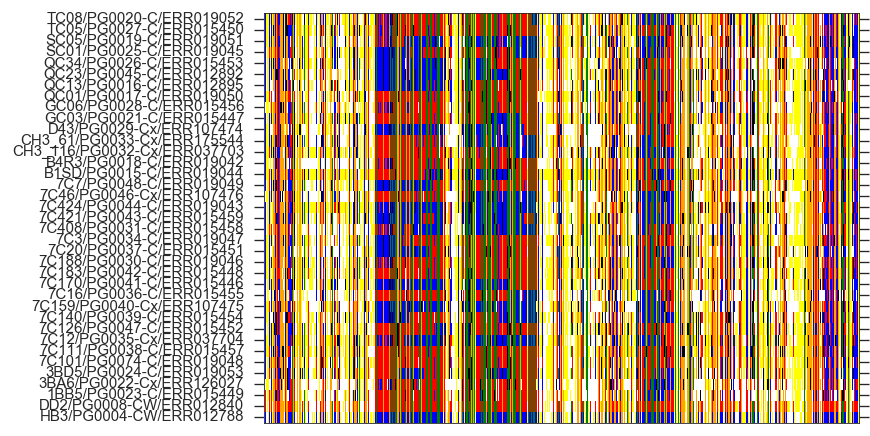

In [6]:
fig, ax = plt.subplots()
callset = gatk_raw['hb3_dd2']
chrom = 'Pf3D7_12_v3'
plot_inheritance(ax, callset, chrom)

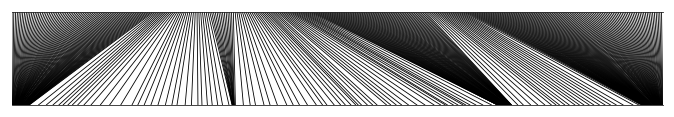

In [7]:
fig, ax = plt.subplots(figsize=(7, 1))
pos = gatk_raw['hb3_dd2']['variants']['POS']
chrom = 'Pf3D7_12_v3'
plot_variants_locator(ax, gatk_raw['hb3_dd2'], chrom, step=100)

In [8]:
def fig_inheritance(fig, callsets, cross, chrom, filename=None, step=100):
    
    callset = callsets[cross]
    
    ax = plt.subplot2grid((9, 1), (0, 0), rowspan=6)
    # don't include parents
    n_samples = len(callset['calldata'].dtype.names)
    plot_inheritance(ax, callset, chrom, sample_indices=range(2, n_samples))
    ax.set_xticks([])
#    ax.set_title('%s, chromosome %s' % (LABELS[cross], int(chrom[6:8])), fontsize=8)
    ax.set_ylabel('progeny clones', rotation=90)
    ax.yaxis.tick_left()
    ax.set_yticklabels([])
    
    ax = plt.subplot2grid((9, 1), (6, 0))
    plot_variants_locator(ax, callset, chrom, step=step)
    #ax.set_xticklabels([])
    ax.set_xticks([])
    
    ax = plt.subplot2grid((9, 1), (7, 0))
    plot_accessibility(ax, chrom, cross, linewidth=.5)
    ax.set_ylabel('accessibility', rotation=0, ha='right', va='center')
    
    ax = plt.subplot2grid((9, 1), (8, 0))
    plot_genes(ax, chrom)
    # ax.set_xticks([])
    # ax.spines['bottom'].set_visible(False)
    ax.set_ylabel('genes', rotation=0, ha='right', va='center')
    ax.set_xlabel('position (bp)')
    
    fig.subplots_adjust(hspace=0.02, left=.12, top=.9, right=.98, bottom=.13)
        

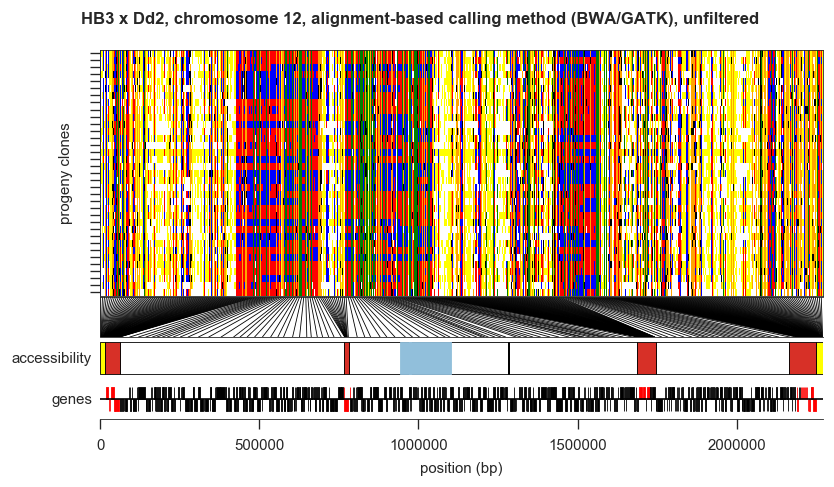

In [9]:
chrom = 'Pf3D7_12_v3'
callsets = gatk_raw
cross = 'hb3_dd2'
fig = plt.figure(figsize=(7, 4))
fig.suptitle('%s, chromosome %s, alignment-based calling method (BWA/GATK), unfiltered' % (LABELS[cross], int(chrom[6:8])), 
             fontsize=10, fontweight='bold')
fig_inheritance(fig, callsets, cross, chrom, step=100)
fn = '../../artwork/supp/filtering_alignment_unfiltered.{dpi}.{fmt}'
for fmt in 'jpeg', 'png':
    for dpi in 120, 300:
        fig.savefig(fn.format(dpi=dpi, fmt=fmt), dpi=dpi, jpeg_quality=100)


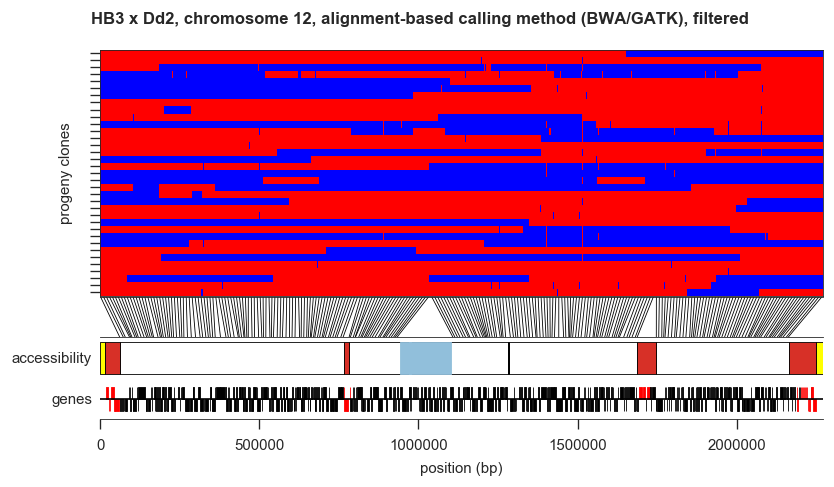

In [10]:
chrom = 'Pf3D7_12_v3'
callsets = gatk_filtered
cross = 'hb3_dd2'
fig = plt.figure(figsize=(7, 4))
fig.suptitle('%s, chromosome %s, alignment-based calling method (BWA/GATK), filtered' % (LABELS[cross], int(chrom[6:8])), 
             fontsize=10, fontweight='bold')
fig_inheritance(fig, callsets, cross, chrom, step=10, filename=None)
fn = '../../artwork/supp/filtering_alignment_filtered.{dpi}.{fmt}'
for fmt in 'jpeg', 'png':
    for dpi in 120, 300:
        fig.savefig(fn.format(dpi=dpi, fmt=fmt), dpi=dpi, jpeg_quality=100)


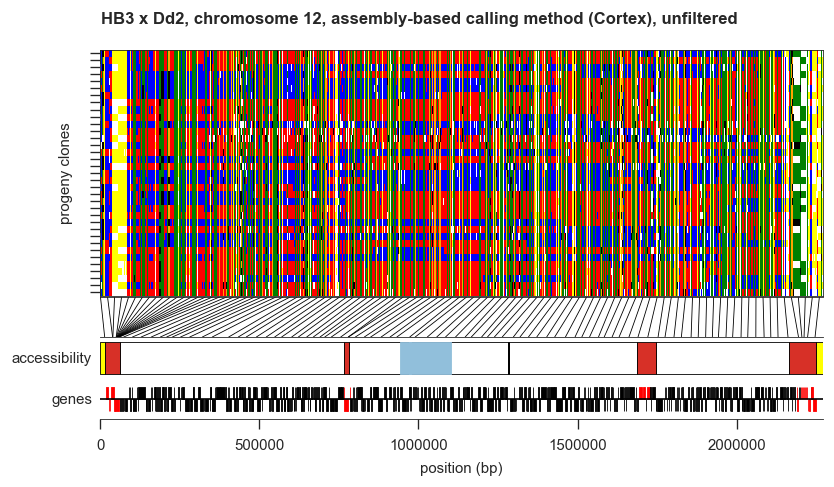

In [11]:
chrom = 'Pf3D7_12_v3'
callsets = cortex_raw
cross = 'hb3_dd2'
fig = plt.figure(figsize=(7, 4))
fig.suptitle('%s, chromosome %s, assembly-based calling method (Cortex), unfiltered' % (LABELS[cross], int(chrom[6:8])), 
             fontsize=10, fontweight='bold')
fig_inheritance(fig, callsets, cross, chrom, step=100, filename=None)
fn = '../../artwork/supp/filtering_assembly_unfiltered.{dpi}.{fmt}'
for fmt in 'jpeg', 'png':
    for dpi in 120, 300:
        fig.savefig(fn.format(dpi=dpi, fmt=fmt), dpi=dpi, jpeg_quality=100)


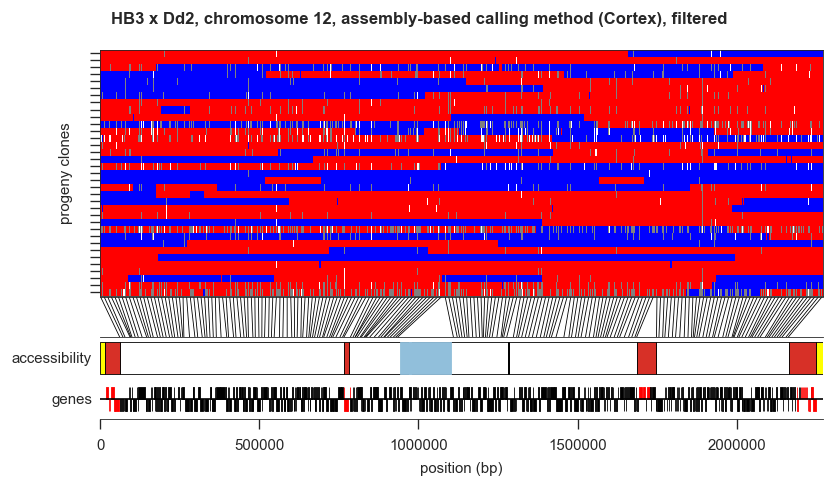

In [12]:
chrom = 'Pf3D7_12_v3'
callsets = cortex_filtered
cross = 'hb3_dd2'
fig = plt.figure(figsize=(7, 4))
fig.suptitle('%s, chromosome %s, assembly-based calling method (Cortex), filtered' % (LABELS[cross], int(chrom[6:8])), 
             fontsize=10, fontweight='bold')
fig_inheritance(fig, callsets, cross, chrom, step=10, filename=None)
fn = '../../artwork/supp/filtering_assembly_filtered.{dpi}.{fmt}'
for fmt in 'jpeg', 'png':
    for dpi in 120, 300:
        fig.savefig(fn.format(dpi=dpi, fmt=fmt), dpi=dpi, jpeg_quality=100)
